# Essential Libraries


Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Seaborn : Higher-level library for Data Visualization  
> Matplotlib : Low-level library for Data Visualization  

In [1192]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

---

# Setup: Import the Dataset

Dataset from Kaggle : Vehicle dataset 

Source: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

The dataset is `car_prediction_data.csv`; hence we use the `read_csv` function from Pandas.  
Immediately after importing, we take a quick look at the data using the `head` function.

In [1193]:
df = pd.read_csv("car_prediction_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


> - Car_Name: Identify the brand or company name along with the specific model of each vehicle.
> - Year: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
> - Selling_Price: Selling price of car
> - Present_Price: Current origin price of car
> - Kms_Driven: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
> - Fuel_Type: Learn about the type of fuel the vehicles run on, whether it's petrol or diesel.
> - Seller_Type: Seller type weather dealer or individual
> - Transmission: Determine the transmission type, whether automatic, manual, or another variant.
> - Owner: How many owner of car (0, 1, 2, or 3)

Print the data type of the DataFrame(df) and its dimensions.

In [1194]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (301, 9)


The data types of each column in the data frame is then printed.

In [1195]:
print(df.dtypes)

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


---

# Cleaning of Dataset

The df.isnull().sum() fuction is used to count the missing values in each column.

In [1196]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

df.describe() is then used to generate the descriptive statistics for the numerical variables of the dataframe.

In [1197]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


The column named 'Car_Name' is removed from the dataset as it is irrelevant in predicting Selling_Price.

In [1198]:
df = df.drop(['Car_Name'], axis=1)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [1199]:
#check if 'Car_Name' is removed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


'Car_Name' column has been successfully removed.

Moving on, the column 'No_of_years' is introduced to determine the duration of car usage by subtracting the purchased year from 2024.

In [1200]:
df['No_of_years'] = 2024 - df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


The 'Year' column is removed from the DataFrame.

In [1201]:
df = df.drop(['Year'], axis=1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [1202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    object 
 4   Seller_Type    301 non-null    object 
 5   Transmission   301 non-null    object 
 6   Owner          301 non-null    int64  
 7   No_of_years    301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


After cleaning the dataset, which involved removing the 'Car_Name' and 'Year' columns and adding the 'No_of_Year' column, the dataset now comprises 8 columns with 301 non-null entries. It contains 3 columns of type int64, 3 columns of type object, and 2 columns of type float64.

After cleaning the dataset, the DataFrame has the following structure:

|   | Column         | Non-Null Count | Dtype   |
|---|----------------|----------------|---------|
| 0 | Selling_Price  | 301            | float64 |
| 1 | Present_Price  | 301            | float64 |
| 2 | Kms_Driven     | 301            | int64   |
| 3 | Fuel_Type      | 301            | object  |
| 4 | Seller_Type    | 301            | object  |
| 5 | Transmission   | 301            | object  |
| 6 | Owner          | 301            | int64   |
| 7 | No_of_years    | 301            | int64   |


---

# Analysis of Categorical Variable

The categorical variable 'Fuel_Type', 'Seller_Type', 'Transmission' and 'Owner' are extracted to generate a dfCatData DataFrame.

In [1203]:
dfCatData = pd.DataFrame(df[['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']])
dfCatData.head()

,Fuel_Type,Seller_Type,Transmission,Owner
0,Petrol,Dealer,Manual,0
1,Diesel,Dealer,Manual,0
2,Petrol,Dealer,Manual,0
3,Petrol,Dealer,Manual,0
4,Diesel,Dealer,Manual,0


The unique values for each categorical column is then printed.

In [1204]:
print(dfCatData['Fuel_Type'].unique())
print(dfCatData['Seller_Type'].unique())
print(dfCatData['Transmission'].unique())
print(dfCatData['Owner'].unique())


['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


Convert the DataFrame to categorical data type.

In [1205]:
dfCatData = dfCatData.astype('category')

In [1206]:
dfCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Fuel_Type     301 non-null    category
 1   Seller_Type   301 non-null    category
 2   Transmission  301 non-null    category
 3   Owner         301 non-null    category
dtypes: category(4)
memory usage: 1.8 KB


---

## Check the Variable Independently

Summary Statistics of `dfCatData`, followed by Statistical Visualizations on the variables. 

In [1207]:
dfCatData.describe()

,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301,301,301
unique,3,2,2,3
top,Petrol,Dealer,Manual,0
freq,239,195,261,290



1. **Fuel_Type**
   - **Count**: There are 301 observations for the `Fuel_Type` variable.
   - **Unique**: There are 3 unique categories within `Fuel_Type`. This suggests that the vehicles in the dataset can be powered by one of three different types of fuel.
   - **Top**: The most common fuel type is `Petrol`, observed in most of the vehicles.
   - **Frequency**: `Petrol` appears 239 times, indicating it is the predominant fuel choice among the vehicles in this dataset.

2. **Seller_Type**
   - **Count**: This variable also has 301 entries.
   - **Unique**: There are 2 unique seller types, suggesting two kinds of entities or individuals from whom these vehicles can be purchased.
   - **Top**: The most common seller type is `Dealer`.
   - **Frequency**: Vehicles sold by dealers are more frequent with 195 out of 301 entries, suggesting that most transactions are likely handled through dealers rather than private sellers.

3. **Transmission**
   - **Count**: There are 301 observations for the `Transmission` variable.
   - **Unique**: This variable has 2 unique values, which indicate the type of transmission system the vehicles use.
   - **Top**: The predominant transmission type is `Manual`.
   - **Frequency**: `Manual` transmission is found in 261 vehicles, which heavily favors manual over automatic systems in this dataset.

4. **Owner**
   - **Count**: Like the other variables, `Owner` has 301 observations.
   - **Unique**: There are 3 unique categories, likely reflecting the number of past owners each vehicle has had (e.g., 0, 1, 2+).
   - **Top**: The most frequent category is `0`, suggesting that most vehicles are being sold by their first owner.
   - **Frequency**: The `0` category occurs 290 times, indicating that nearly all vehicles in this dataset are sold by their original owners.


In [1208]:
Fuel_Type = pd.DataFrame(dfCatData['Fuel_Type'])
Seller_Type = pd.DataFrame(dfCatData['Seller_Type'])
Transmission = pd.DataFrame(dfCatData['Transmission'])
Owner = pd.DataFrame(dfCatData['Owner'])

Categorical plot (catplot) is used to display the count of each categorical variable.

### 1. Boxplot of Fuel_Type

C:\Users\hngbo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


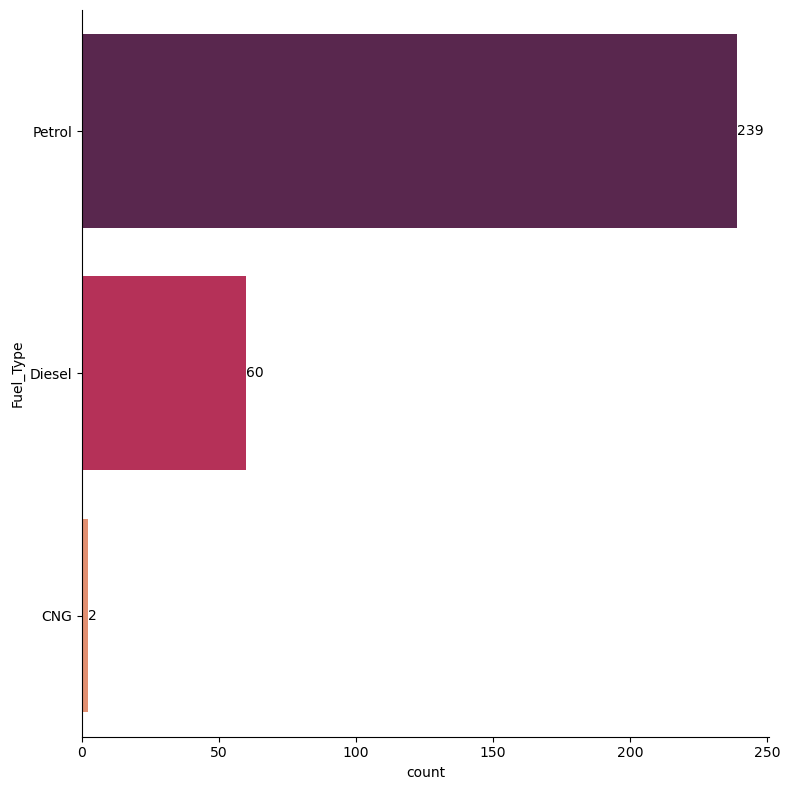

In [1209]:
g = sb.catplot(y='Fuel_Type', data=Fuel_Type, kind="count", height=8, order = dfCatData['Fuel_Type'].value_counts().index, palette = 'rocket')


ax = g.facet_axis(0, 0)  
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center')

plt.show()


Number of count 
> - Petrol : 239
> - Diesel : 60
> - CNG : 2

### 2. Boxplot of Seller_Type

C:\Users\hngbo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


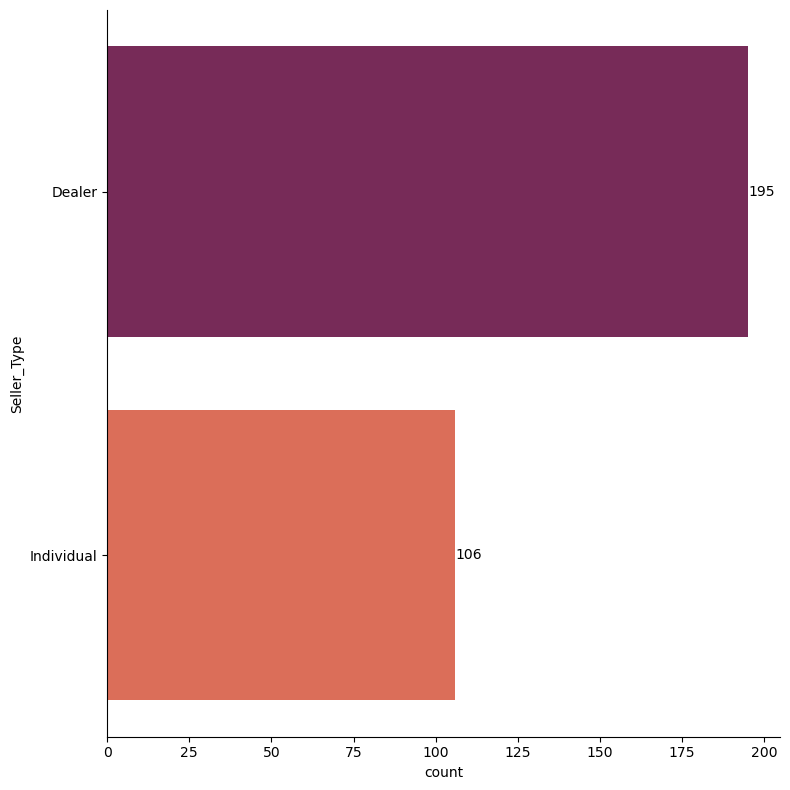

In [1210]:
g = sb.catplot(y='Seller_Type', data=Seller_Type, kind="count", height=8, palette='rocket', order = dfCatData['Seller_Type'].value_counts().index)


ax = g.facet_axis(0, 0)  
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center')

plt.show()


Number of count 
> - Dealer : 195
> - Individual : 106


### 3. Boxplot of Transmission

C:\Users\hngbo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


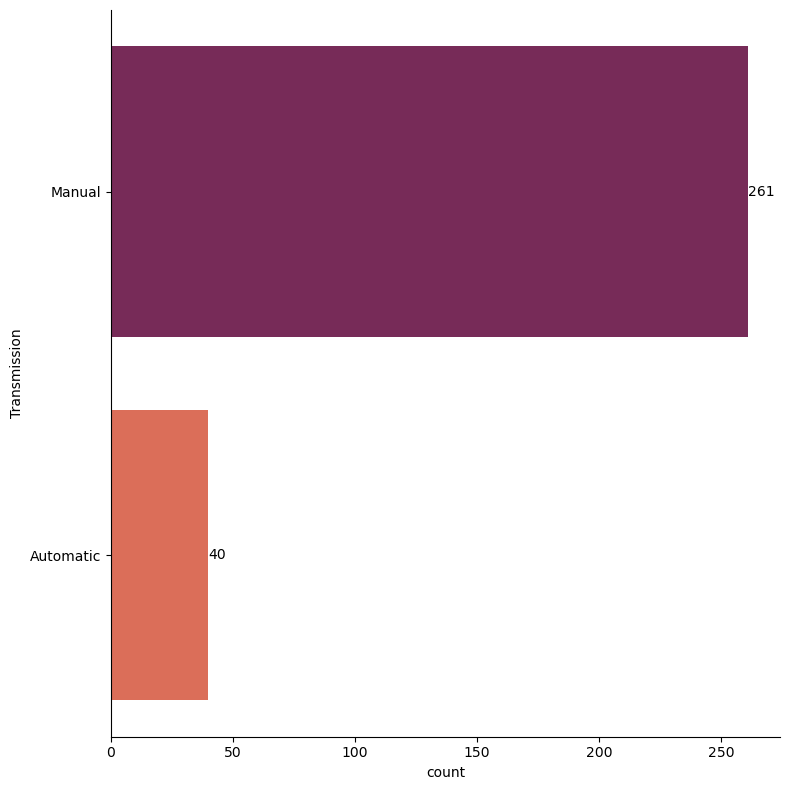

In [1211]:
g = sb.catplot(y='Transmission', data=Transmission, kind="count", height=8, palette='rocket', order = dfCatData['Transmission'].value_counts().index)


ax = g.facet_axis(0, 0)  
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center')

plt.show()


Number of count 
> - Manual : 261
> - Automatic : 40


### 4. Boxplot of Owner

C:\Users\hngbo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


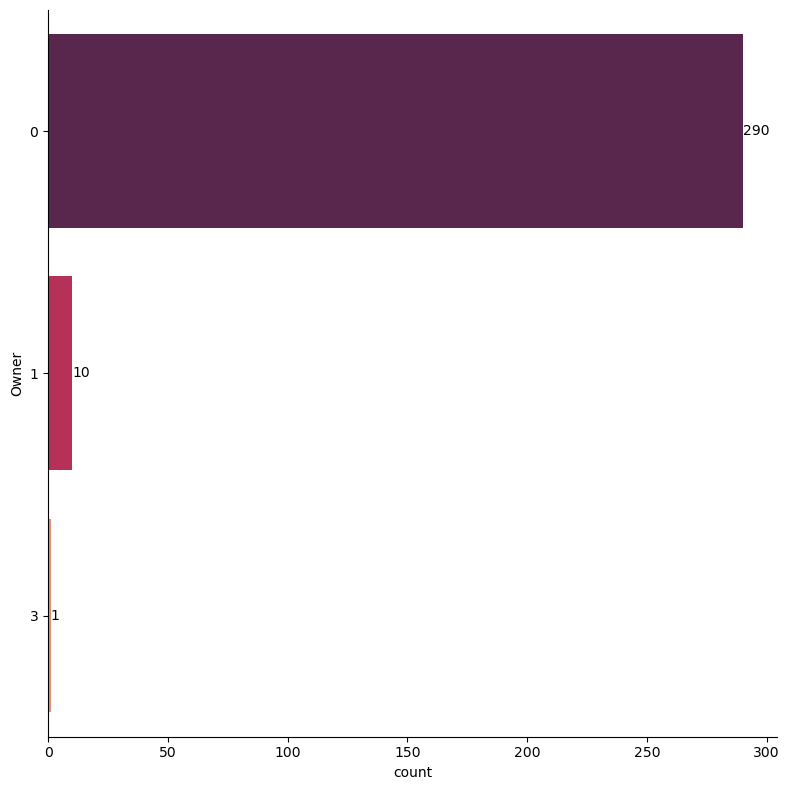

In [1212]:
g = sb.catplot(y='Owner', data=Owner, kind="count", height=8, palette='rocket', order = dfCatData['Owner'].value_counts().index)


ax = g.facet_axis(0, 0)  
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center')

plt.show()


Number of count 
> - 0 : 290
> - 1 : 10
> - 3 : 1


---

## Check the effect of the Categorical Variables on Selling Price

Introduce `SalePrice` to the dataframe to find relationships with the variables.   

In [1213]:
# Add Selling_Price to the dataframe
dfCatData = pd.concat([dfCatData, df["Selling_Price"]], axis = 1).reindex(dfCatData.index)
dfCatData.head()

,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,Petrol,Dealer,Manual,0,3.35
1,Diesel,Dealer,Manual,0,4.75
2,Petrol,Dealer,Manual,0,7.25
3,Petrol,Dealer,Manual,0,2.85
4,Diesel,Dealer,Manual,0,4.60


The following boxplots display the distribution of 'Selling_Price' with respect to each categorical variable.

#### 1. The distribution of `Selling_Price` across different `Fuel_Type`.

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

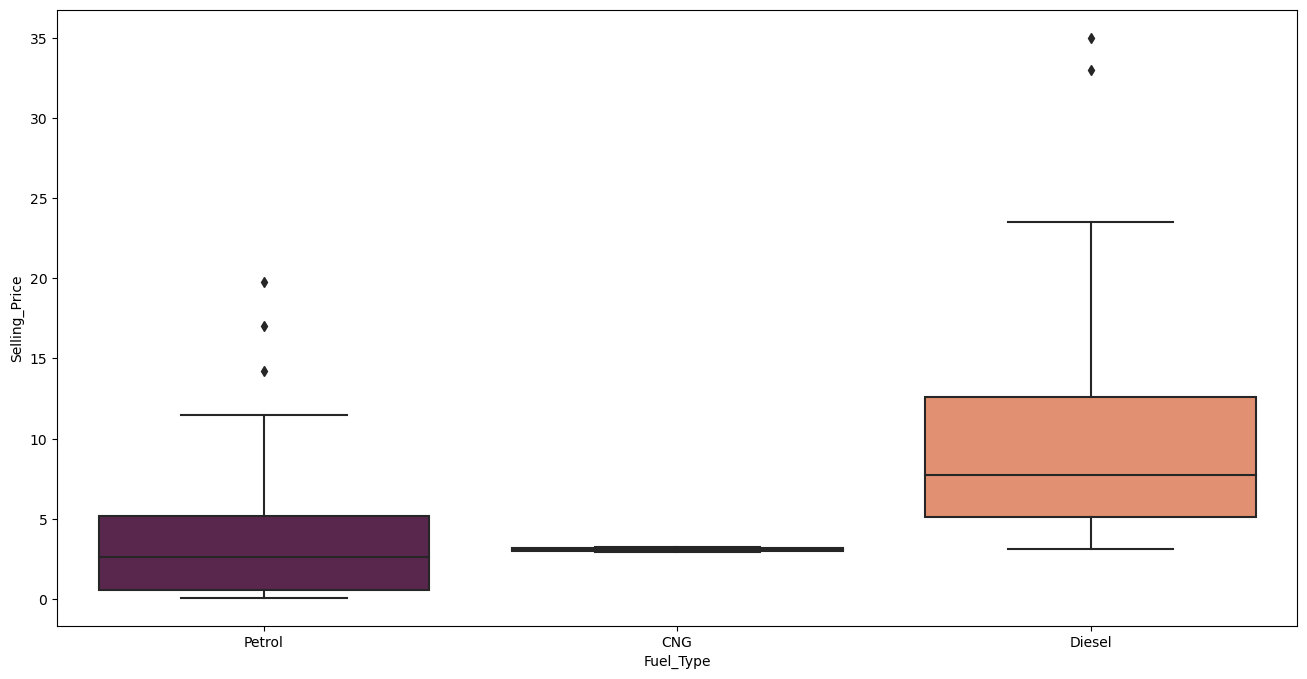

In [1214]:
order = dfCatData.groupby('Fuel_Type')['Selling_Price'].median().sort_values().index

f = plt.figure(figsize=(16, 8))
sb.boxplot(x='Fuel_Type', y='Selling_Price', data=dfCatData, order=order, palette='rocket')


### Observation:
- `Diesel` cars have a higher median selling price compared to `Petrol` and `CNG `cars.
- `Diesel` cars also have awider interquartile range, reflecting more variation in the selling prices of diesel cars. 
- This could be due to `Diesel` cars often having better fuel efficiency and longevity, which can command higher prices.

---

#### 2. The distribution of `Selling_Price` across different `Seller_Type`.

<Axes: xlabel='Seller_Type', ylabel='Selling_Price'>

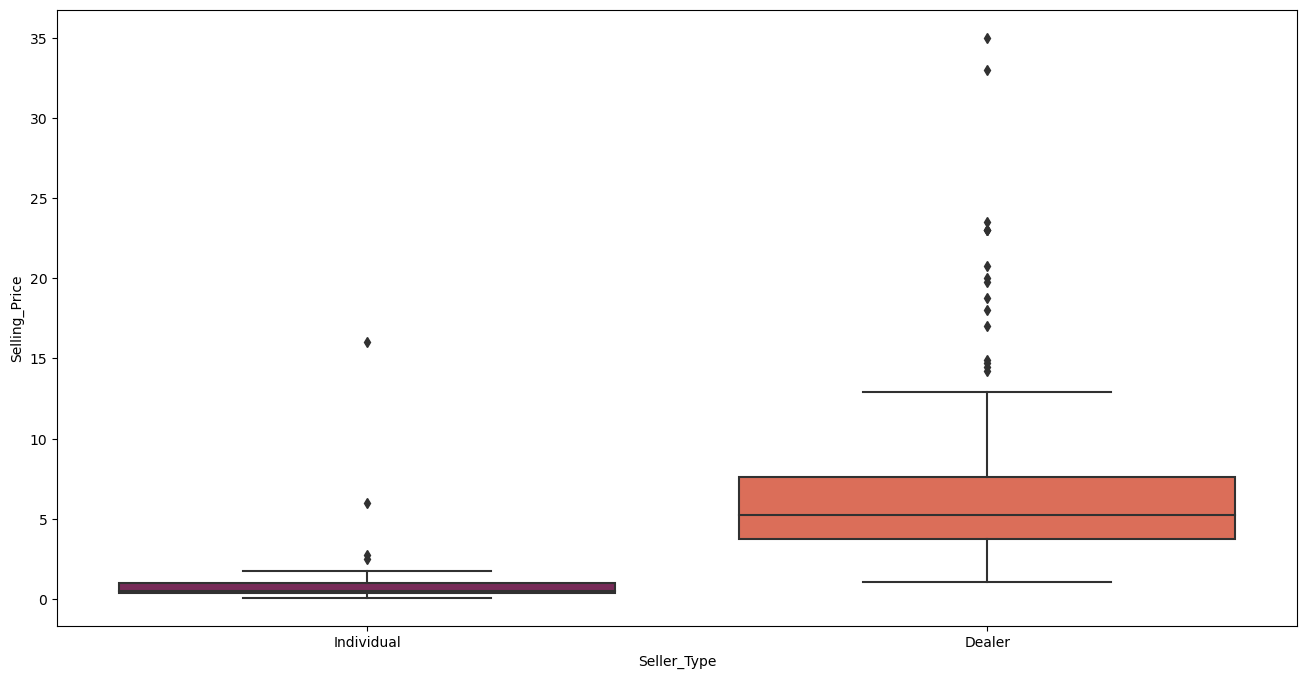

In [1215]:

order = dfCatData.groupby('Seller_Type')['Selling_Price'].median().sort_values().index

# Create the box plot with sorted order
f = plt.figure(figsize=(16, 8))
sb.boxplot(x='Seller_Type', y='Selling_Price', data=dfCatData, order=order, palette='rocket')


### Observation:
- `Dealers` have a much higher median in selling price compared to `individuals` sellers.
- `Dealers` have larger spread in  interquartile range than individuals as well.
- This might be due to `dealers` offering certified pre-owned cars, warranties, and other value-added services that individual sellers typically do not provide.

---

#### 3. The distribution of `Selling_Price` across different `Transmission`.

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

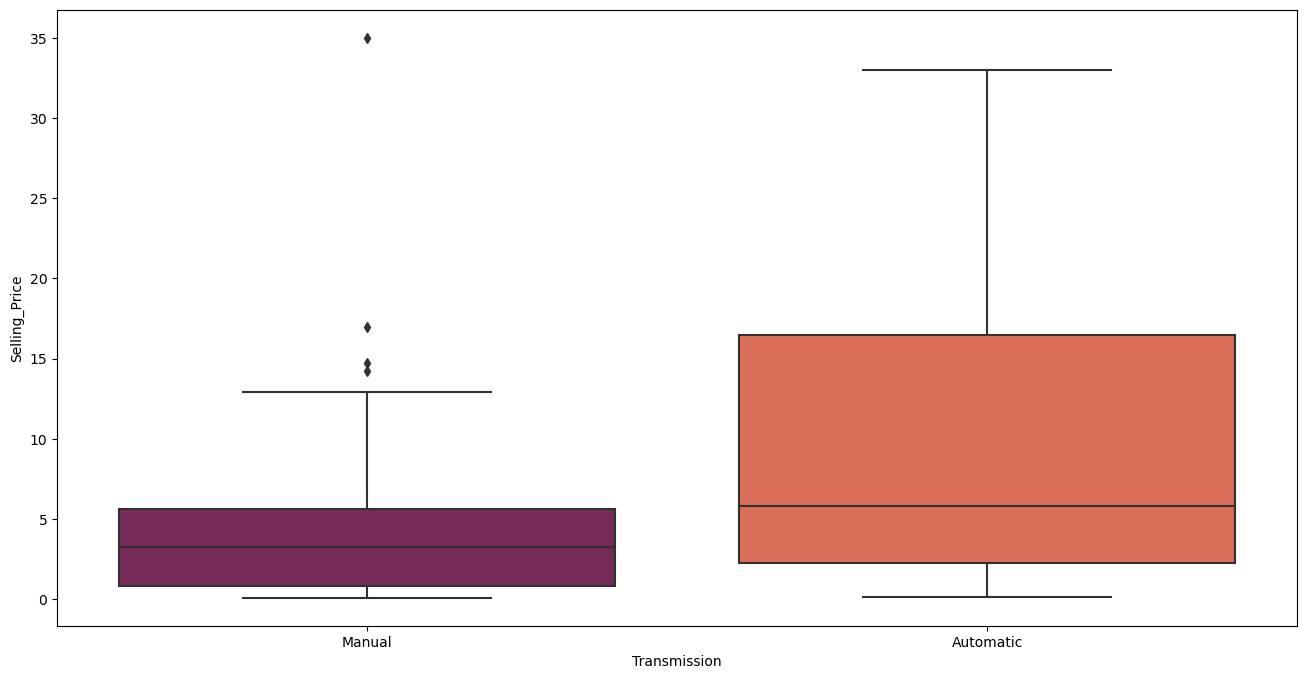

In [1216]:
# Define the order of Fuel_Type based on median Selling_Price
order = dfCatData.groupby('Transmission')['Selling_Price'].median().sort_values().index

# Create the box plot with sorted order
f = plt.figure(figsize=(16, 8))
sb.boxplot(x='Transmission', y='Selling_Price', data=dfCatData, order=order, palette='rocket')

### Observation:

- `Automatic` cars have a higher median selling price.
- `Automatic` cars have higher interquartile range as well, which  suggests greater variability in prices for automatic cars.
- This indicates that transmission type does have a significant impact on selling prices, with `automatic` cars generally selling for more.

---

#### 4. The distribution of `Selling_Price` across different `Owner`.

<Axes: xlabel='Owner', ylabel='Selling_Price'>

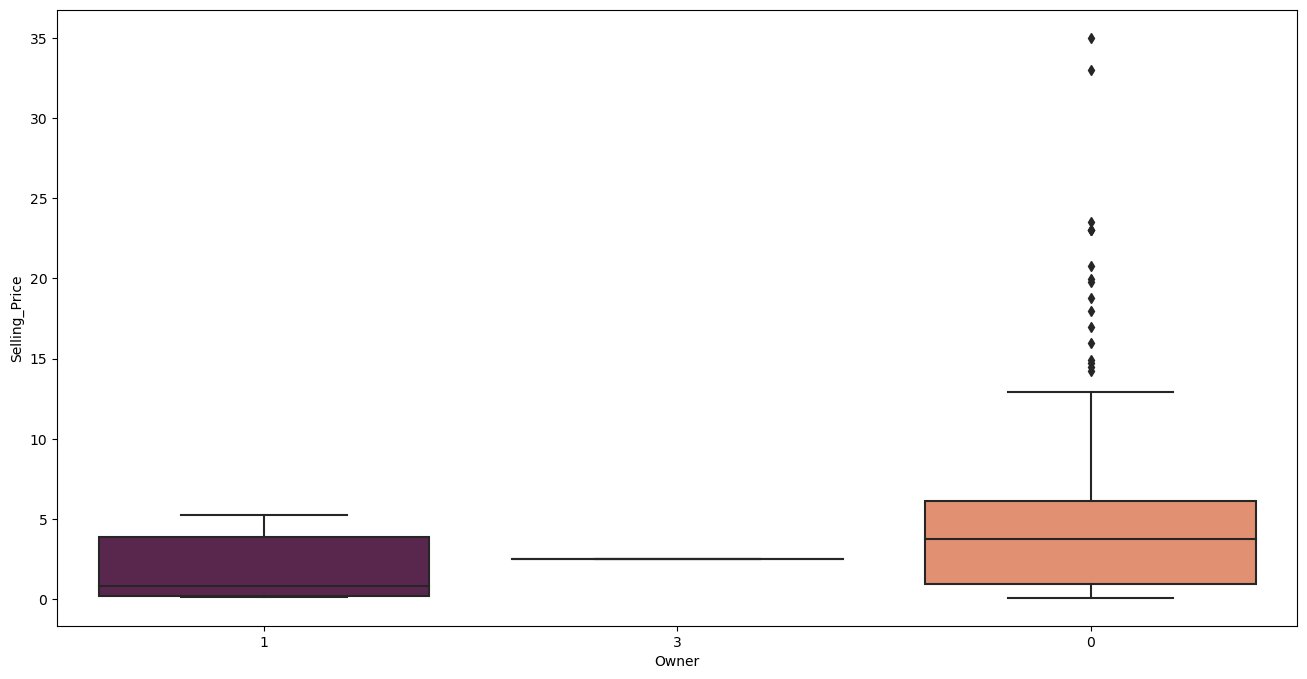

In [1217]:

order = dfCatData.groupby('Owner')['Selling_Price'].median().sort_values().index

# Create the box plot with sorted order
f = plt.figure(figsize=(16, 8))
sb.boxplot(x='Owner', y='Selling_Price', data=dfCatData, order=order, palette='rocket')


### Observation:
- The box plot shows that cars with fewer previous owners tend to sell for higher prices.
- Brand-new cars with `0` owners have higher median than cars with `1` and `3` previous owner.
- Brand-new cars with `0` owners have greater interquartile range among other variables as well.
- It is important to note that the `3` owner categoryt has very few data points, which makes it difficult to draw concise conclusions for that category.
- The results could be due to cars with fewer owners are perceived to be better maintained or less used, therefore resulting in higher selling price.

### Conclusion:

> - `Fuel_Type`: Moderately important variable. There is notable variation in the 'Selling_Price' across different fuel types, with diesel cars tending to have higher prices. The CNG category has significantly fewer data points, which may limit the reliability of comparisons.


> - `Seller_Type`: Most important variable. There is a huge variation in 'Selling_Price between cars sold by individuals and dealers, with dealers selling at much higher median prices and high interquartile range.


> - `Transmission`: Moderately important variable. Automatic cars have a higher median 'Selling_Price' and show a greater spread in prices as indicated by a wider interquartile range. 


> - `Owner`: Less important variable. While there is some variation in 'Selling_Price' across owner categories, the median prices do not differ dramatically. There is a moderate variation in the interquartile range, with the category for 3 or more previous owners having fewer data points, making it difficult to draw concise conclusions for cars with multiple past owners.



---


## Analysis of Numerical Variable   

The numerical variable 'Present_Price', 'Kms_Driven', and 'No_of_Years' are extracted to generate a dfNumData DataFrame.

In [1218]:
dfNumData = pd.DataFrame(df[['Present_Price', 'Kms_Driven', 'No_of_years']])
dfNumData.head()

,Present_Price,Kms_Driven,No_of_years
0,5.59,27000,10
1,9.54,43000,11
2,9.85,6900,7
3,4.15,5200,13
4,6.87,42450,10


---

### Check the variables independantly

In [1219]:
Present_Price = pd.DataFrame(dfNumData['Present_Price'])
Kms_Driven = pd.DataFrame(dfNumData['Kms_Driven'])
No_of_years = pd.DataFrame(dfNumData['No_of_years'])

Summary Statistics of `dfNumData`, followed by Statistical Visualizations on the variables. 

In [1220]:
dfNumData.describe()

,Present_Price,Kms_Driven,No_of_years
count,301.000000,301.000000,301.000000
mean,7.628472,36947.205980,10.372093
std,8.644115,38886.883882,2.891554
min,0.320000,500.000000,6.000000
25%,1.200000,15000.000000,8.000000
50%,6.400000,32000.000000,10.000000
75%,9.900000,48767.000000,12.000000
max,92.600000,500000.000000,21.000000


#### 1. Statistical visualisation of Present_Price

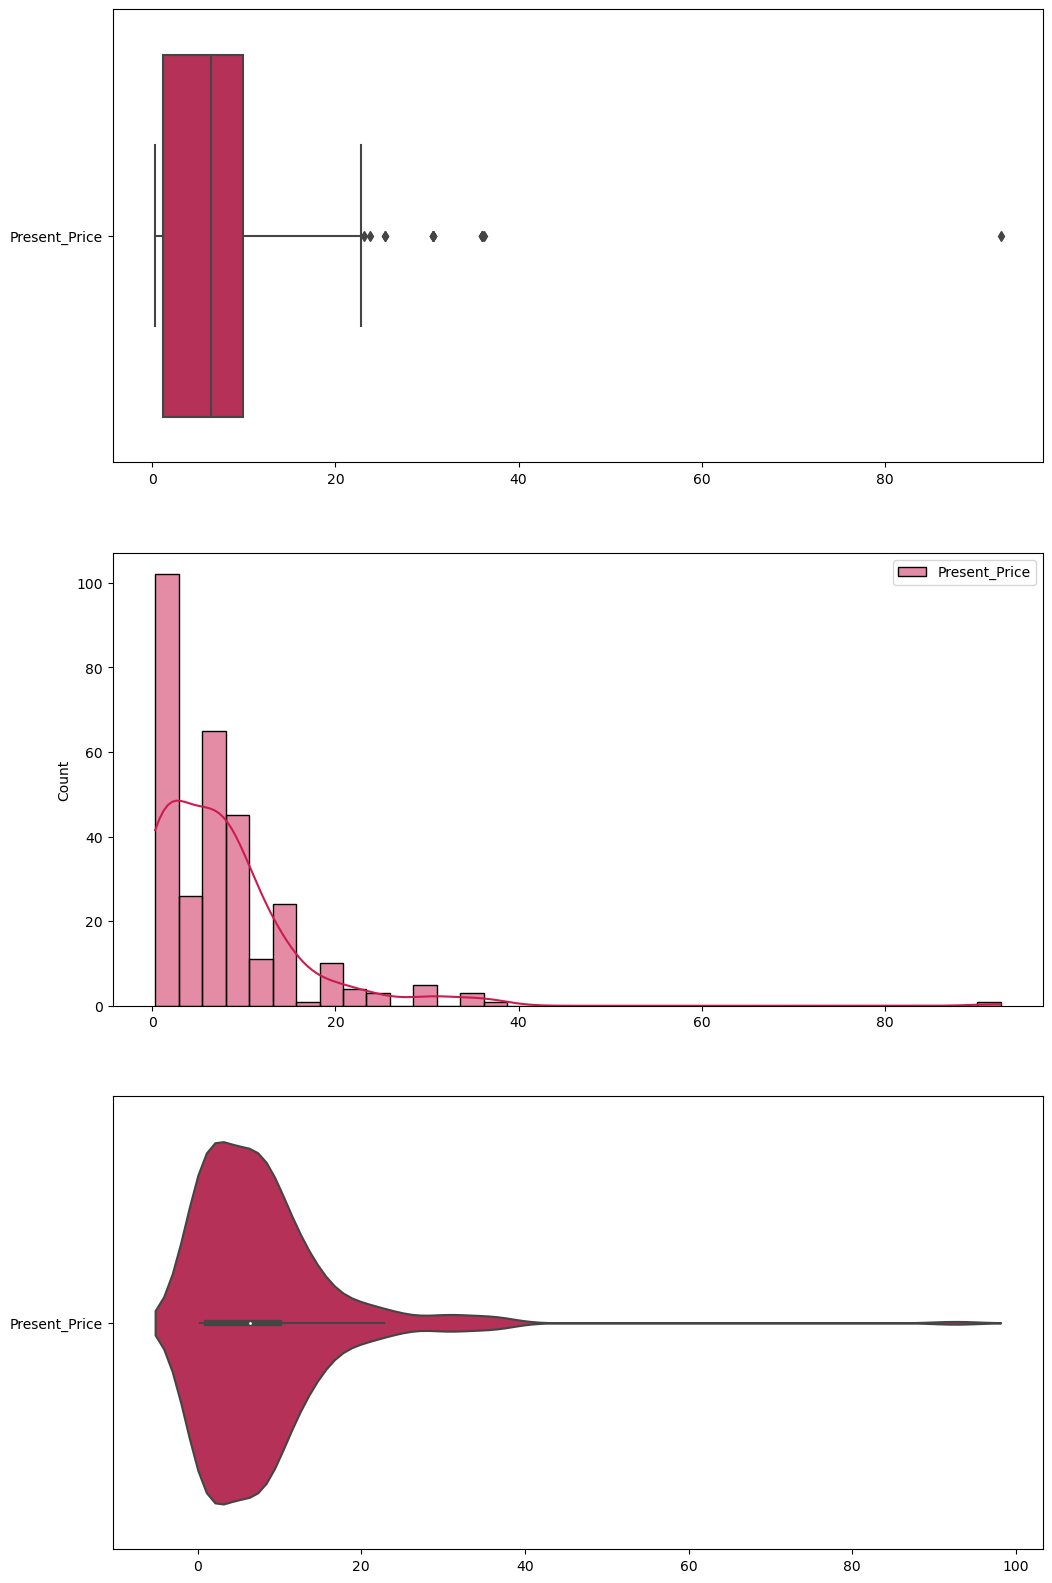

<Figure size 640x480 with 0 Axes>

In [1221]:
f, axes = plt.subplots(3, 1, figsize= (12, 20) )


sb.boxplot(data = Present_Price, orient = "h", ax = axes[0], palette='rocket')
sb.histplot(data = Present_Price, ax = axes[1], kde = True, palette='rocket')
sb.violinplot(data = Present_Price, orient = "h", ax = axes[2], palette='rocket')

f = plt.figure()

#### 2. Statistical visualisation of Kms_Driven

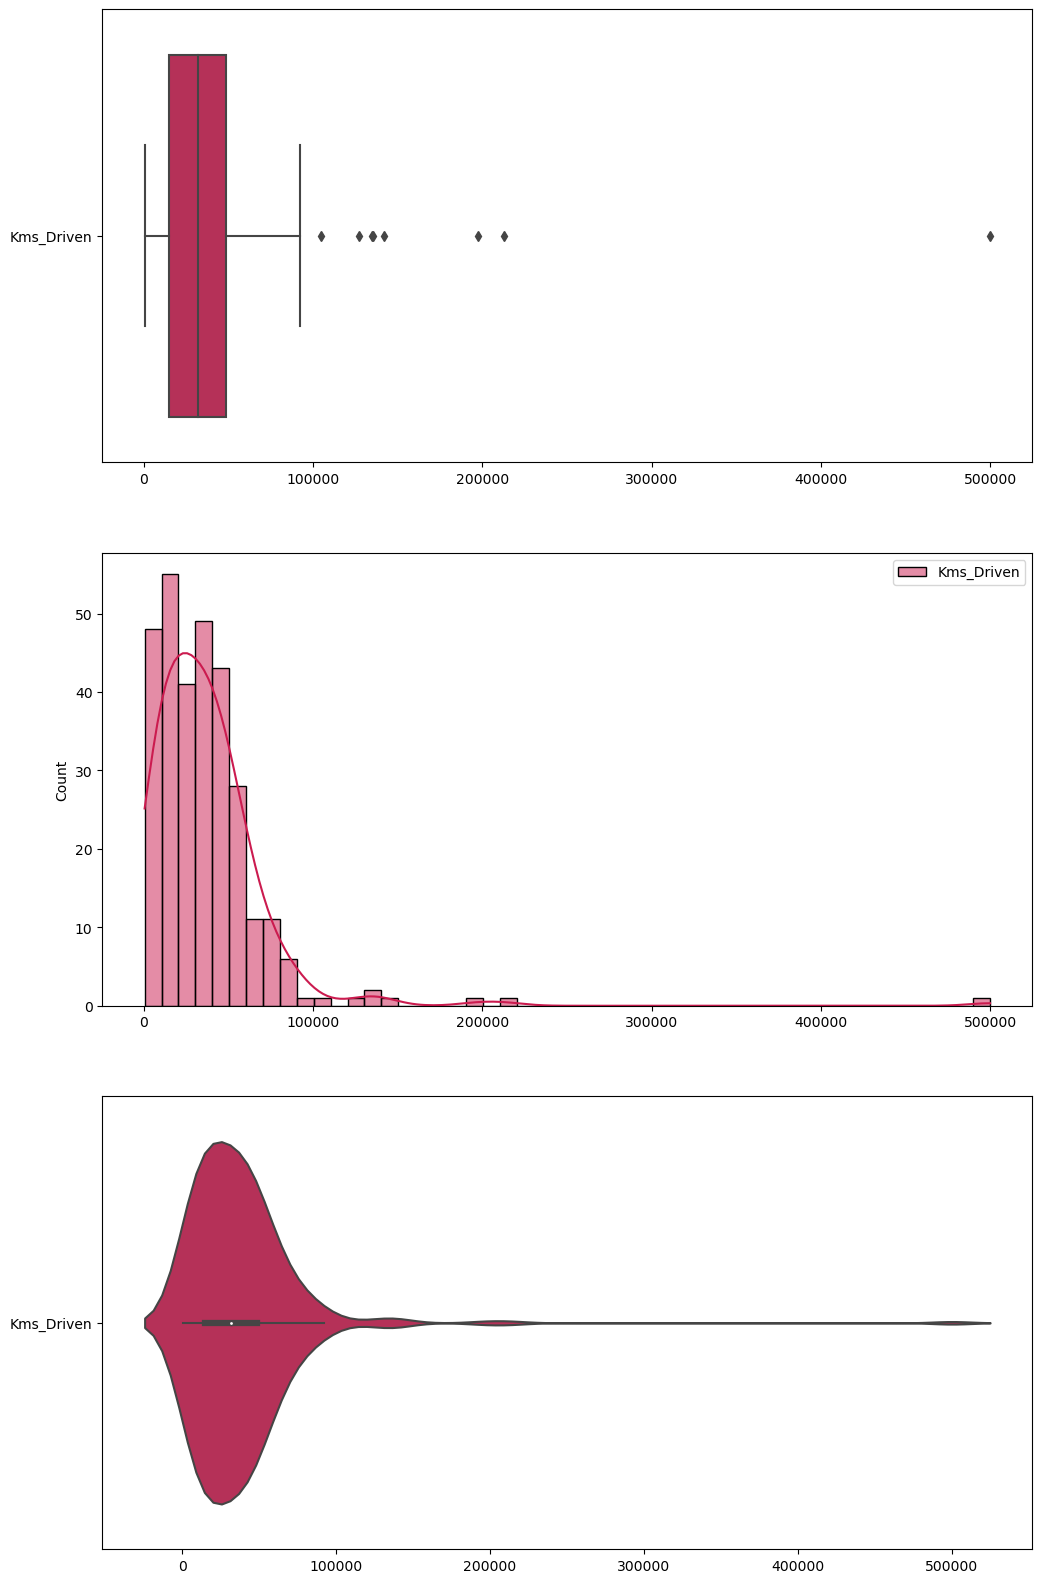

<Figure size 640x480 with 0 Axes>

In [1222]:
f, axes = plt.subplots(3, 1, figsize= (12, 20) )

sb.boxplot(data = Kms_Driven, orient = "h", ax = axes[0], palette = 'rocket')
sb.histplot(data = Kms_Driven, ax = axes[1], kde = True, palette = 'rocket')
sb.violinplot(data = Kms_Driven, orient = "h", ax = axes[2], palette = 'rocket')

f = plt.figure()

#### 3. Statistical visualisation of No_of_Years

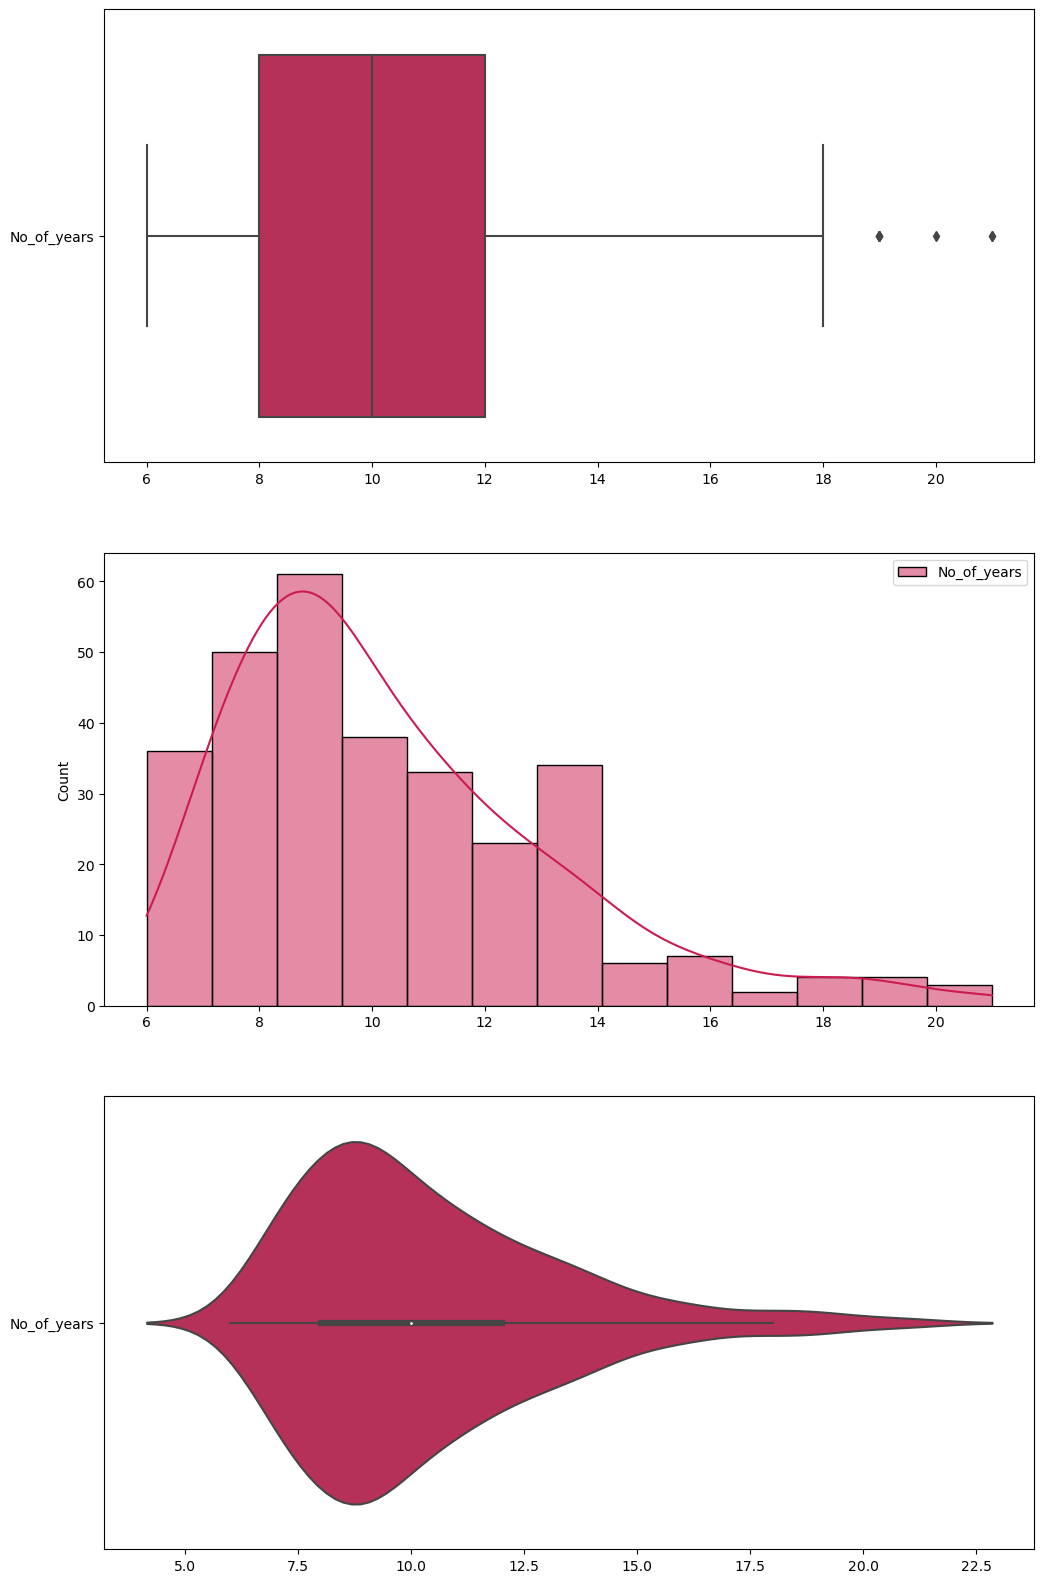

<Figure size 640x480 with 0 Axes>

In [1223]:
f, axes = plt.subplots(3, 1, figsize= (12, 20))

sb.boxplot(data = No_of_years, orient = "h", ax = axes[0], palette='rocket')
sb.histplot(data = No_of_years, ax = axes[1], kde = True, palette='rocket')
sb.violinplot(data = No_of_years, orient = "h", ax = axes[2], palette='rocket')


f = plt.figure()

### Calculate the skewness of each variable

In [1224]:
dfNumData.skew(axis = 0, skipna = True)

Present_Price    4.083150
Kms_Driven       6.436013
No_of_years      1.246189
dtype: float64

### Counting the number of outliers in each variable
   
- Inter-Quartile Range $IQR$ = $Q3 - Q1$
- Lower whisker = $Q1 - 1.5 \times IQR$ = $Q1 - 1.5 \times (Q3 - Q1)$
- Upper whisker = $Q3 + 1.5 \times IQR$ = $Q3 + 1.5 \times (Q3 - Q1)$

In [1225]:
q1 = dfNumData.quantile(0.25)
q3 = dfNumData.quantile(0.75)
iqr = q3-q1
outliers = ((dfNumData < q1-1.5*iqr) | (dfNumData > q3+1.5*iqr)).sum()
outliers

Present_Price    14
Kms_Driven        8
No_of_years       7
dtype: int64

### Check the Relationships with Selling_Price

Add `Selling_Price` to the dataframe to check all Correlations and bi-variate Jointplots.

               Present_Price  Kms_Driven  No_of_years  Selling_Price
Present_Price       1.000000    0.203647     0.047584       0.878983
Kms_Driven          0.203647    1.000000     0.524342       0.029187
No_of_years         0.047584    0.524342     1.000000      -0.236141
Selling_Price       0.878983    0.029187    -0.236141       1.000000


<Axes: >

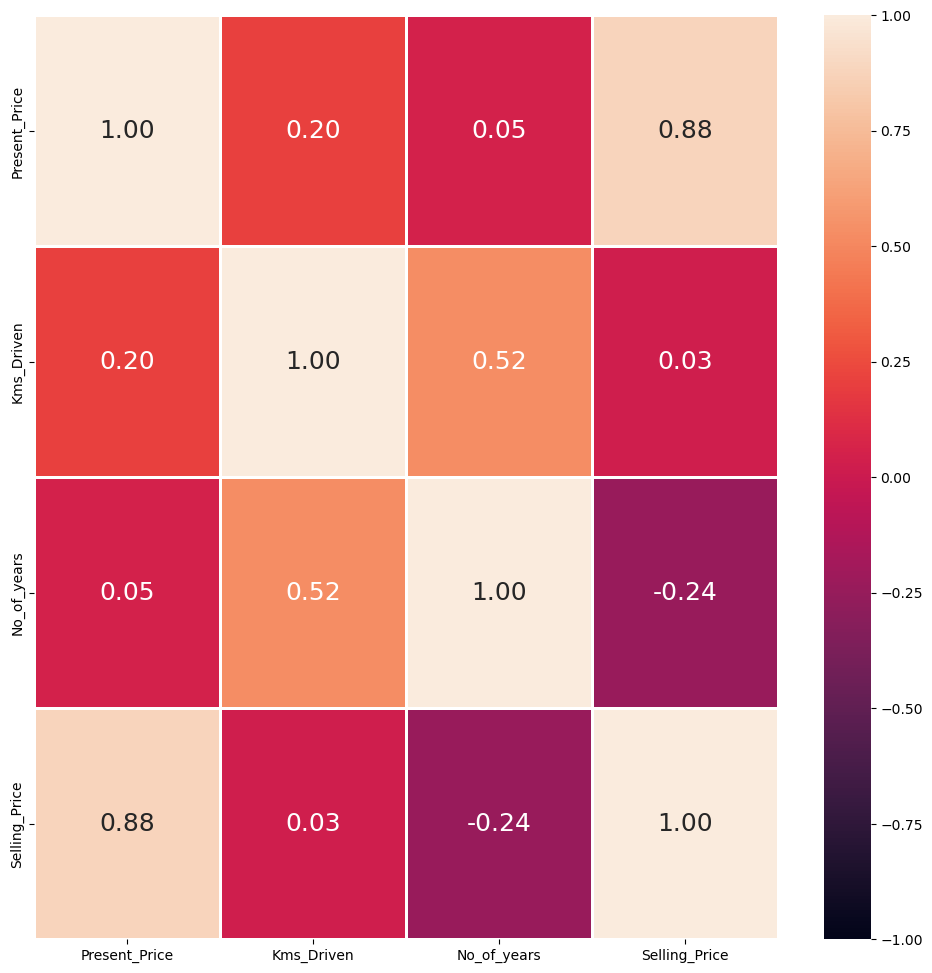

In [1226]:
# Add Selling_Price to the dataframe
dfNumData = pd.concat([dfNumData, df["Selling_Price"]], axis = 1).reindex(dfNumData.index)

# Correlation Matrix
print(dfNumData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(dfNumData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap='rocket')

C:\Users\hngbo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


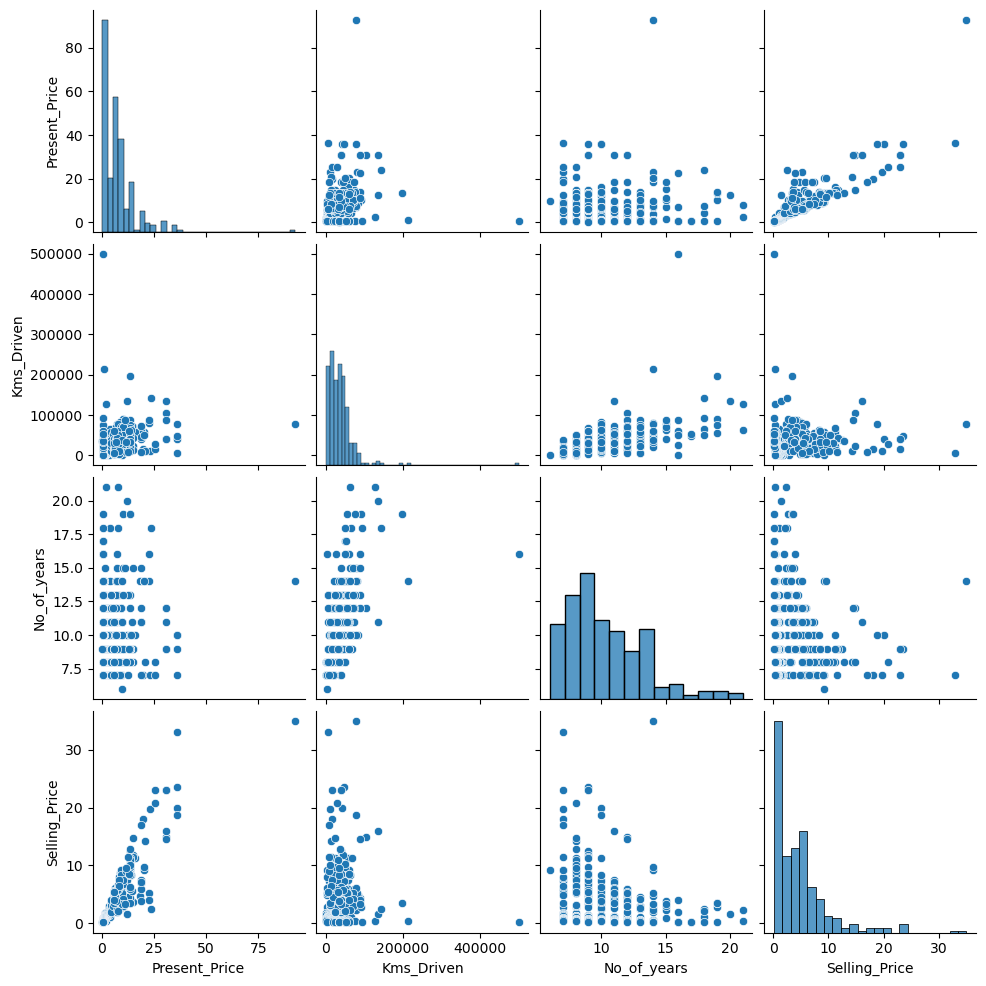

In [1227]:
sb.pairplot(data=dfNumData)


### Discussion

> - `Present_Price`: Highest correlationship value of 0.88, indicating strong positive relationship between Present_Price and Selling_Price. The histogram is left-skewed, indicating most car has a low Present_Price for now.
> - `Kms_Driven`: Lowest correlationship value of 0.03, indicating weak positive relationship between Kms_Drivena dn Selling_Price. The histogram is left-skewed, indicating most car has short Kms_driven distance.
> - `No_of_Years`: Moderate correlationship value of -0.24, representing a moderate negative relationship between No_of_Years and Selling_Price. The histogram is slightly left_skewed as well, suggests that most cars have been in use for a relatively short period.


---

## One-Hot Encoding

One-hot encode categorical variables in df DataFrame, the first category is dropped to prevent multicollinearity.

In [1228]:
df = pd.get_dummies(df,drop_first=True)

In [1229]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


In [1230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   Owner                   301 non-null    int64  
 4   No_of_years             301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    bool   
 6   Fuel_Type_Petrol        301 non-null    bool   
 7   Seller_Type_Individual  301 non-null    bool   
 8   Transmission_Manual     301 non-null    bool   
dtypes: bool(4), float64(2), int64(3)
memory usage: 13.1 KB


In [1231]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'No_of_years',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

---

## Calculate and visualize the correlation between 'Selling_Price' and predictor variables

<Axes: >

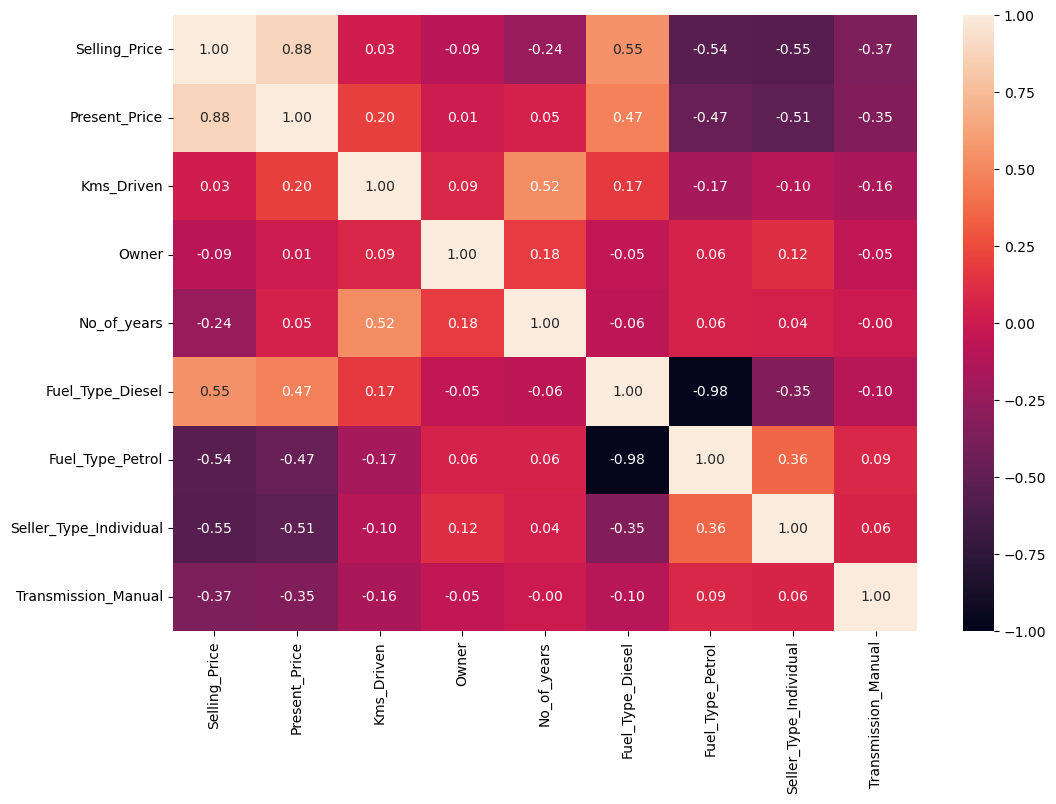

In [1232]:
# Correlation between Response and the Predictors
corr_res_pred = pd.concat([df['Selling_Price'], df.drop(['Selling_Price'], axis=1)], axis = 1).reindex(df['Selling_Price'].index)
# jointPlot = pd.concat([data_encoded["time_spent"], data_encoded[['income_time_spent_interaction','age_time_spent_interaction','age_income_interaction']]], axis=1)

# jointPlot.corr()
f = plt.figure(figsize=(12, 8))
sb.heatmap(corr_res_pred.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

The 'Owner' variable is removed from the dataset due to its low correlation coefficient of -0.09 with 'Selling_Price' and the highly uneven distribution of data among its categories. With 290 instances for '0' owners, merely 10 instances for '1' owners, and only 1 instance for '3' owners, it lacks predictive utility in determining sales prices.

In [1233]:
df = df.drop(['Owner'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   No_of_years             301 non-null    int64  
 4   Fuel_Type_Diesel        301 non-null    bool   
 5   Fuel_Type_Petrol        301 non-null    bool   
 6   Seller_Type_Individual  301 non-null    bool   
 7   Transmission_Manual     301 non-null    bool   
dtypes: bool(4), float64(2), int64(2)
memory usage: 10.7 KB


---

# Linear Regression Attempt 1

Import necessary libraries for linear regression model.

In [1234]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

 > - `LinearRegression`: used to perform the regression
 > - `train_test_split`: divide the data into training and testing sets
 > - `mean_squared_error`: to evaluate the model performance

## Preparing Data

The target variable (Selling_Price) and the predictors of dataset are separated. The dataset is then split into a 70% training set and a 30% testing set. The random state parameter ensures that the splits are reproducible.


In [1235]:
#Extract Response and Predictors
y = pd.DataFrame(df['Selling_Price'])
X = pd.DataFrame(df.drop(columns=['Selling_Price']))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=32)
# Set random state to 
# ensure the data will be split into the same training and testing sets every time the code is executed unless the test_size is changed

In [1236]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

Intercept of Regression 	: b =  [7.34949629]
Coefficients of Regression 	: a =  [[ 4.23211357e-01 -5.00889913e-06 -4.60093798e-01  2.36509572e+00
   3.22313082e-01 -1.24996087e+00 -1.44349787e+00]]

               Predictors  Coefficients
0           Present_Price      0.423211
1              Kms_Driven     -0.000005
2             No_of_years     -0.460094
3        Fuel_Type_Diesel      2.365096
4        Fuel_Type_Petrol      0.322313
5  Seller_Type_Individual     -1.249961
6     Transmission_Manual     -1.443498



## Training the model

The Linear Regression model is trained with the training data. The model's intercept and coefficients are printed to understand the influence of each predictor. The model is then used to predict the responses for both training and testing sets.

In [1237]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

Intercept of Regression 	: b =  [7.34949629]
Coefficients of Regression 	: a =  [[ 4.23211357e-01 -5.00889913e-06 -4.60093798e-01  2.36509572e+00
   3.22313082e-01 -1.24996087e+00 -1.44349787e+00]]

               Predictors  Coefficients
0           Present_Price      0.423211
1              Kms_Driven     -0.000005
2             No_of_years     -0.460094
3        Fuel_Type_Diesel      2.365096
4        Fuel_Type_Petrol      0.322313
5  Seller_Type_Individual     -1.249961
6     Transmission_Manual     -1.443498




The coefficients provide valuable insights into how various factors are influencing the selling price of used cars. <br/> 

Positive coefficients (`Present_Price`, `Fuel_Type_Diesel`, `Fuel_Type_Petrol`) indicate factors that increase the selling price, whereas negative coefficients (`Kms_Driven`, `No_of_years`, `Seller_Type_Individual`, T`ransmission_Manual`) are indicative of factors that decrease it.<br/>

The magnitude of these coefficients alongside their signs helps in understanding the relative importance and impact of these features on the selling price. For instance, the large positive coefficient for `Fuel_Type_Diesel` indicates a significant premium for diesel cars, whereas the small negative value for `Kms_Driven` suggests only a minor penalty for higher usage.

## Visualizing predictions

The graph showing the predictions of the regression model against the actual values for both training and testing data is plotted . This visual assessment helps in understanding the accuracy and reliability of the model predictions.

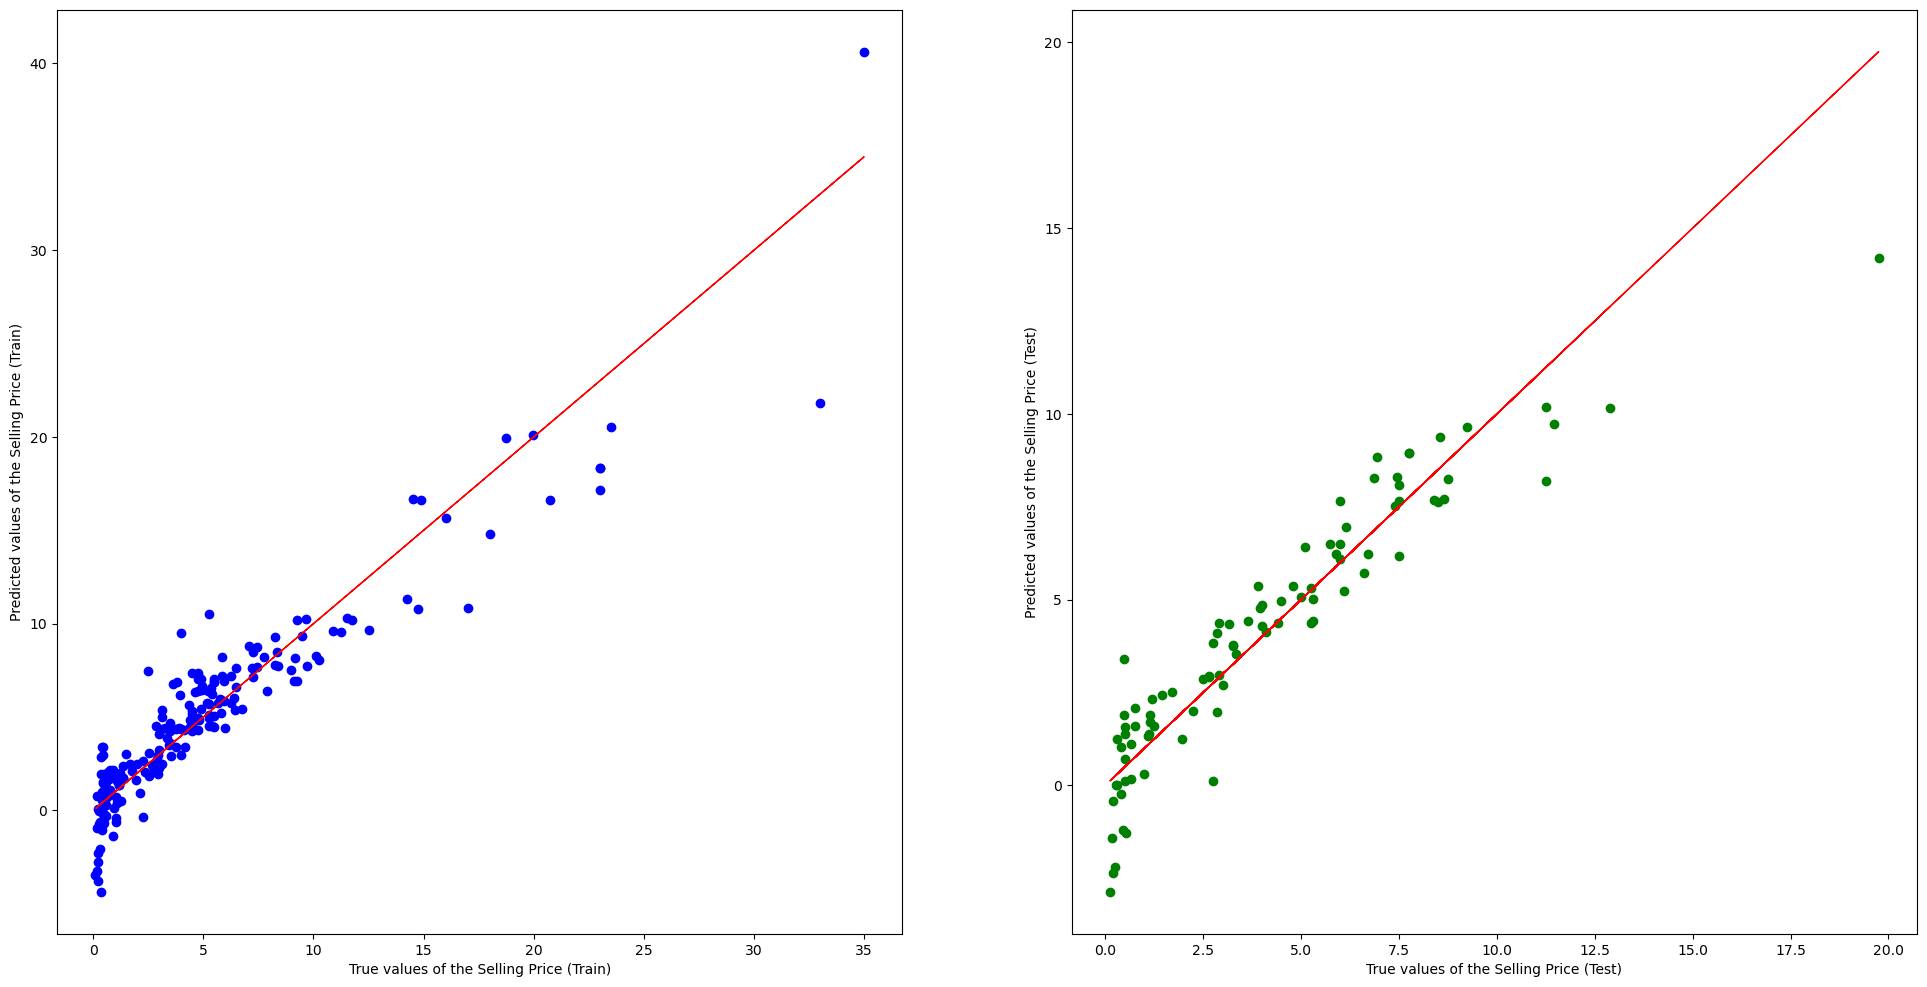

In [1238]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Selling Price (Train)")
axes[0].set_ylabel("Predicted values of the Selling Price (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Selling Price (Test)")
axes[1].set_ylabel("Predicted values of the Selling Price (Test)")
plt.show()

## Evaluating model performance

The model's performance is evaluated by computing R-squared and Mean Squared Error for both training and testing datasets. These metrics help determine how well the model fits the data and predicts outcomes.

In [1239]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8812298019092535
Mean Squared Error (MSE) 	: 3.7103068940650843

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.871305274287517
Mean Squared Error (MSE) 	: 1.6282952422823909



### Numeric Analysis

- **R-squared**: The R-squared value for the train dataset is around 0.881 and 0.871 for the test dataset. Both these values are very close to 1. This implies that a large proportion of the variance in the dependent variable is explained by the independent variables for both datasets. This also suggests that a better fit of the model to the test dataset and train dataset.


- **Mean Squared Error (MSE)**: The MSE values are 3.710 for the train dataset and 1.629 for the test dataset. Typically, the MSE of the test dataset is only slightly higher than that of the train dataset if no overfitting occurs. However, it is unusual for the MSE of the test dataset to be significantly better (lower) than that of the train dataset. This implies that the average squared difference between the observed and predicted values for the test dataset is much lower than that for the train dataset. Therefore, our next step is to investigate whether this scenario is unavoidable without setting the random_state for splitting the dataset into train and test datasets.



## Preparing Data  to see if MSE of test set is lower (better) than that of train set is unavoidable

The target variable (Selling_Price) and the predictors of dataset are separated. The dataset is then split into a 70% training set and a 30% testing set. The random state parameter ensures that the splits are reproducible.


In [1240]:
#Extract Response and Predictors
y = pd.DataFrame(df['Selling_Price'])
X = pd.DataFrame(df.drop(columns=['Selling_Price']))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# Set random state to 
# ensure the data will be split into the same training and testing sets every time the code is executed unless the test_size is changed

In [1241]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

Intercept of Regression 	: b =  [5.66444918]
Coefficients of Regression 	: a =  [[ 4.15965748e-01 -1.95155586e-05 -2.89320986e-01  2.66174826e+00
   6.36182362e-01 -1.52532935e+00 -1.19711235e+00]]

               Predictors  Coefficients
0           Present_Price      0.415966
1              Kms_Driven     -0.000020
2             No_of_years     -0.289321
3        Fuel_Type_Diesel      2.661748
4        Fuel_Type_Petrol      0.636182
5  Seller_Type_Individual     -1.525329
6     Transmission_Manual     -1.197112



## Training the model

The Linear Regression model is trained with the training data. The model's intercept and coefficients are printed to understand the influence of each predictor. The model is then used to predict the responses for both training and testing sets.

In [1242]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

Intercept of Regression 	: b =  [5.66444918]
Coefficients of Regression 	: a =  [[ 4.15965748e-01 -1.95155586e-05 -2.89320986e-01  2.66174826e+00
   6.36182362e-01 -1.52532935e+00 -1.19711235e+00]]

               Predictors  Coefficients
0           Present_Price      0.415966
1              Kms_Driven     -0.000020
2             No_of_years     -0.289321
3        Fuel_Type_Diesel      2.661748
4        Fuel_Type_Petrol      0.636182
5  Seller_Type_Individual     -1.525329
6     Transmission_Manual     -1.197112



## Visualizing predictions

The graph showing the predictions of the regression model against the actual values for both training and testing data is plotted . This visual assessment helps in understanding the accuracy and reliability of the model predictions.

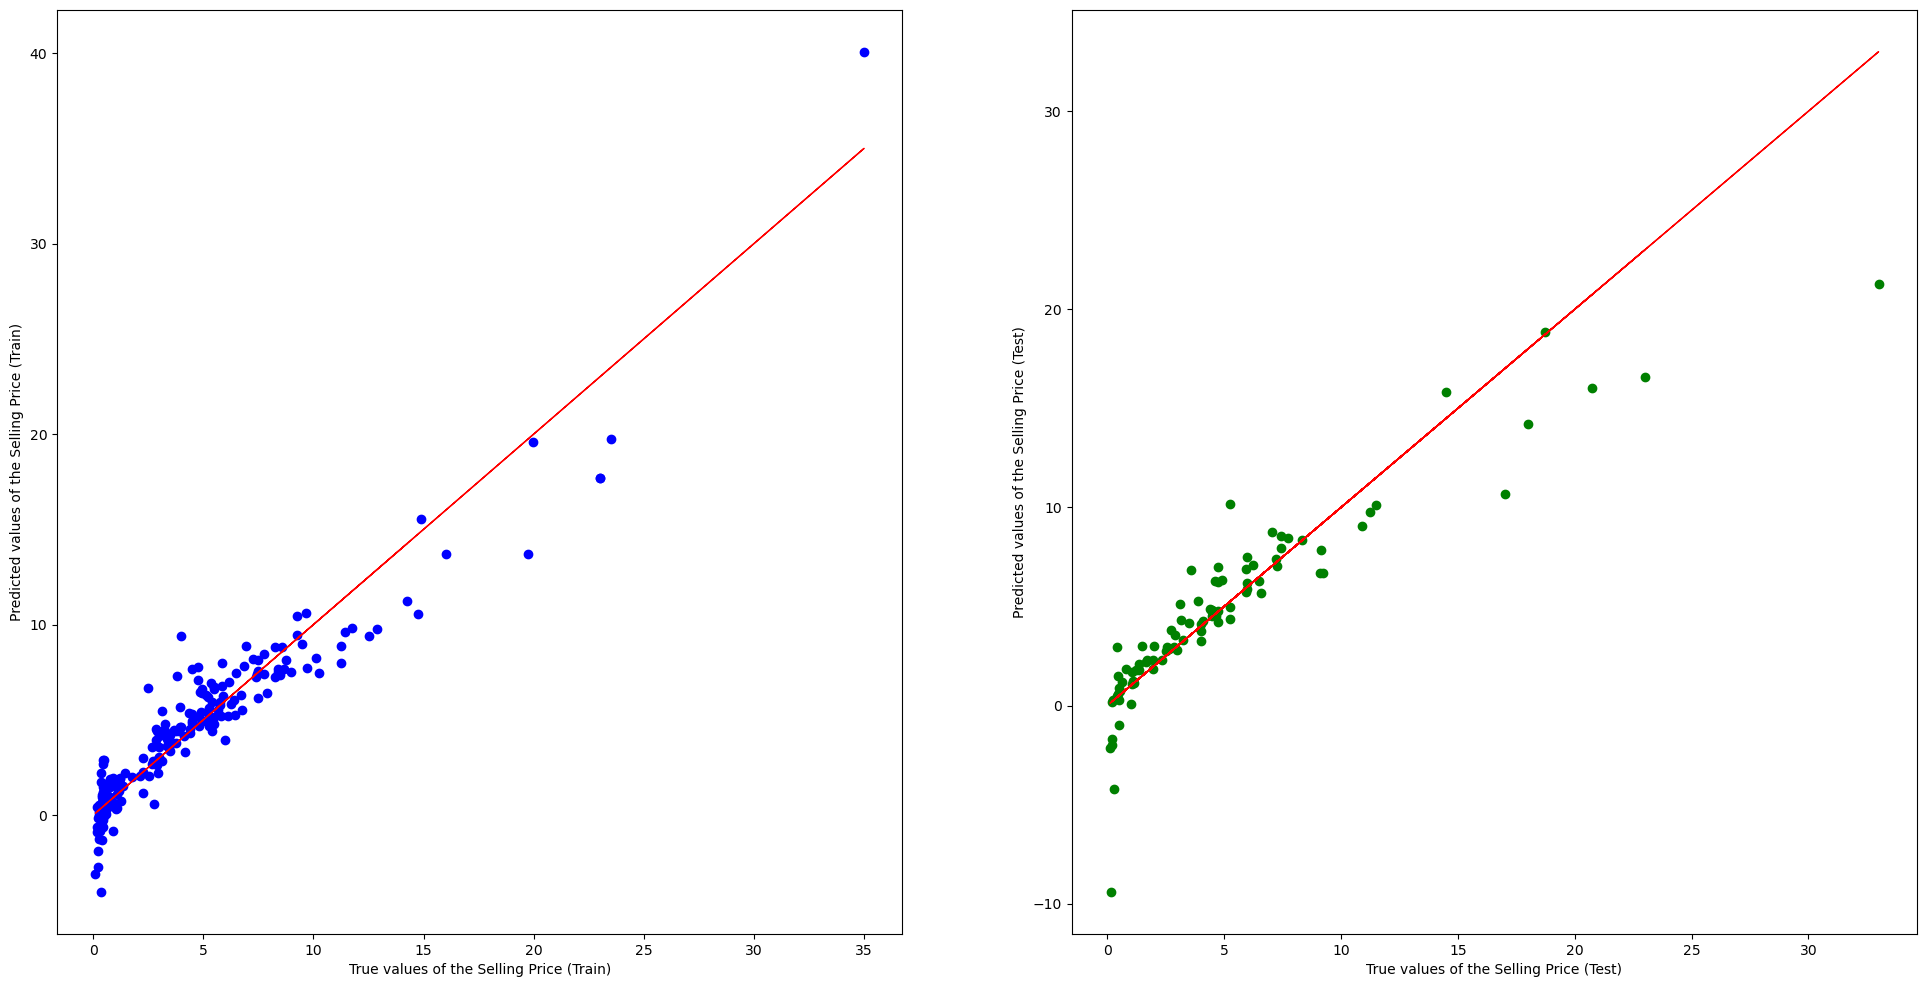

In [1243]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Selling Price (Train)")
axes[0].set_ylabel("Predicted values of the Selling Price (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Selling Price (Test)")
axes[1].set_ylabel("Predicted values of the Selling Price (Test)")
plt.show()

## Evaluating model performance

The model's performance is evaluated by computing R-squared and Mean Squared Error for both training and testing datasets. These metrics help determine how well the model fits the data and predicts outcomes.

In [1244]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8996959853984744
Mean Squared Error (MSE) 	: 2.3659077197499356

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8231114264332804
Mean Squared Error (MSE) 	: 5.398693944566828



---

# Linear Regression Attempt 2

## Preparing data - remove outliers

An outlier removal process was applied before fitting the linear regression model. This is a critical step because outliers can have a disproportionate effect on regression models, skewing the results and potentially leading to poor generalization on unseen data.

In [1245]:
#Extract Response and Predictors
y = pd.DataFrame(df['Selling_Price'])
X = pd.DataFrame(df.drop(columns=['Selling_Price']))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=32)
# Set random state to 
# ensure the data will be split into the same training and testing sets every time the code is executed unless the test_size is changed

In [1246]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate quartiles and IQR for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

In [1247]:
# Calculate outliers mask for numeric columns
numeric_outliers_mask = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)

# Select boolean columns
boolean_columns = df.select_dtypes(include=['bool'])

In [1248]:
# For boolean columns, outliers don't apply
boolean_outliers_mask = pd.Series(False, index=df.index)

# Combine masks for numeric and boolean columns
outliers_mask = numeric_outliers_mask | boolean_outliers_mask

In [1249]:
# Filter the DataFrame to exclude rows identified as outliers
df_no_outliers = df[~outliers_mask]

In [1250]:
#Extract Response and Predictors
y_out = pd.DataFrame(df_no_outliers['Selling_Price'])
X_out = pd.DataFrame(df_no_outliers.drop(columns=['Selling_Price']))

# Split the Dataset into Train and Test
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_out, y_out, test_size = 0.3,random_state=32)
# Set random state to 
# ensure the data will be split into the same training and t

## Training the model

In [1251]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train_out, y_train_out)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train_out, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_out_pred = linreg.predict(X_train_out)
y_test_out_pred = linreg.predict(X_test_out)

Intercept of Regression 	: b =  [4.35242206]
Coefficients of Regression 	: a =  [[ 3.86174877e-01 -1.65453329e-05 -2.62977192e-01  2.13506976e+00
   7.48370152e-01 -1.64149227e+00 -1.45478560e-01]]

               Predictors  Coefficients
0           Present_Price      0.386175
1              Kms_Driven     -0.000017
2             No_of_years     -0.262977
3        Fuel_Type_Diesel      2.135070
4        Fuel_Type_Petrol      0.748370
5  Seller_Type_Individual     -1.641492
6     Transmission_Manual     -0.145479



## Visualizing predictions

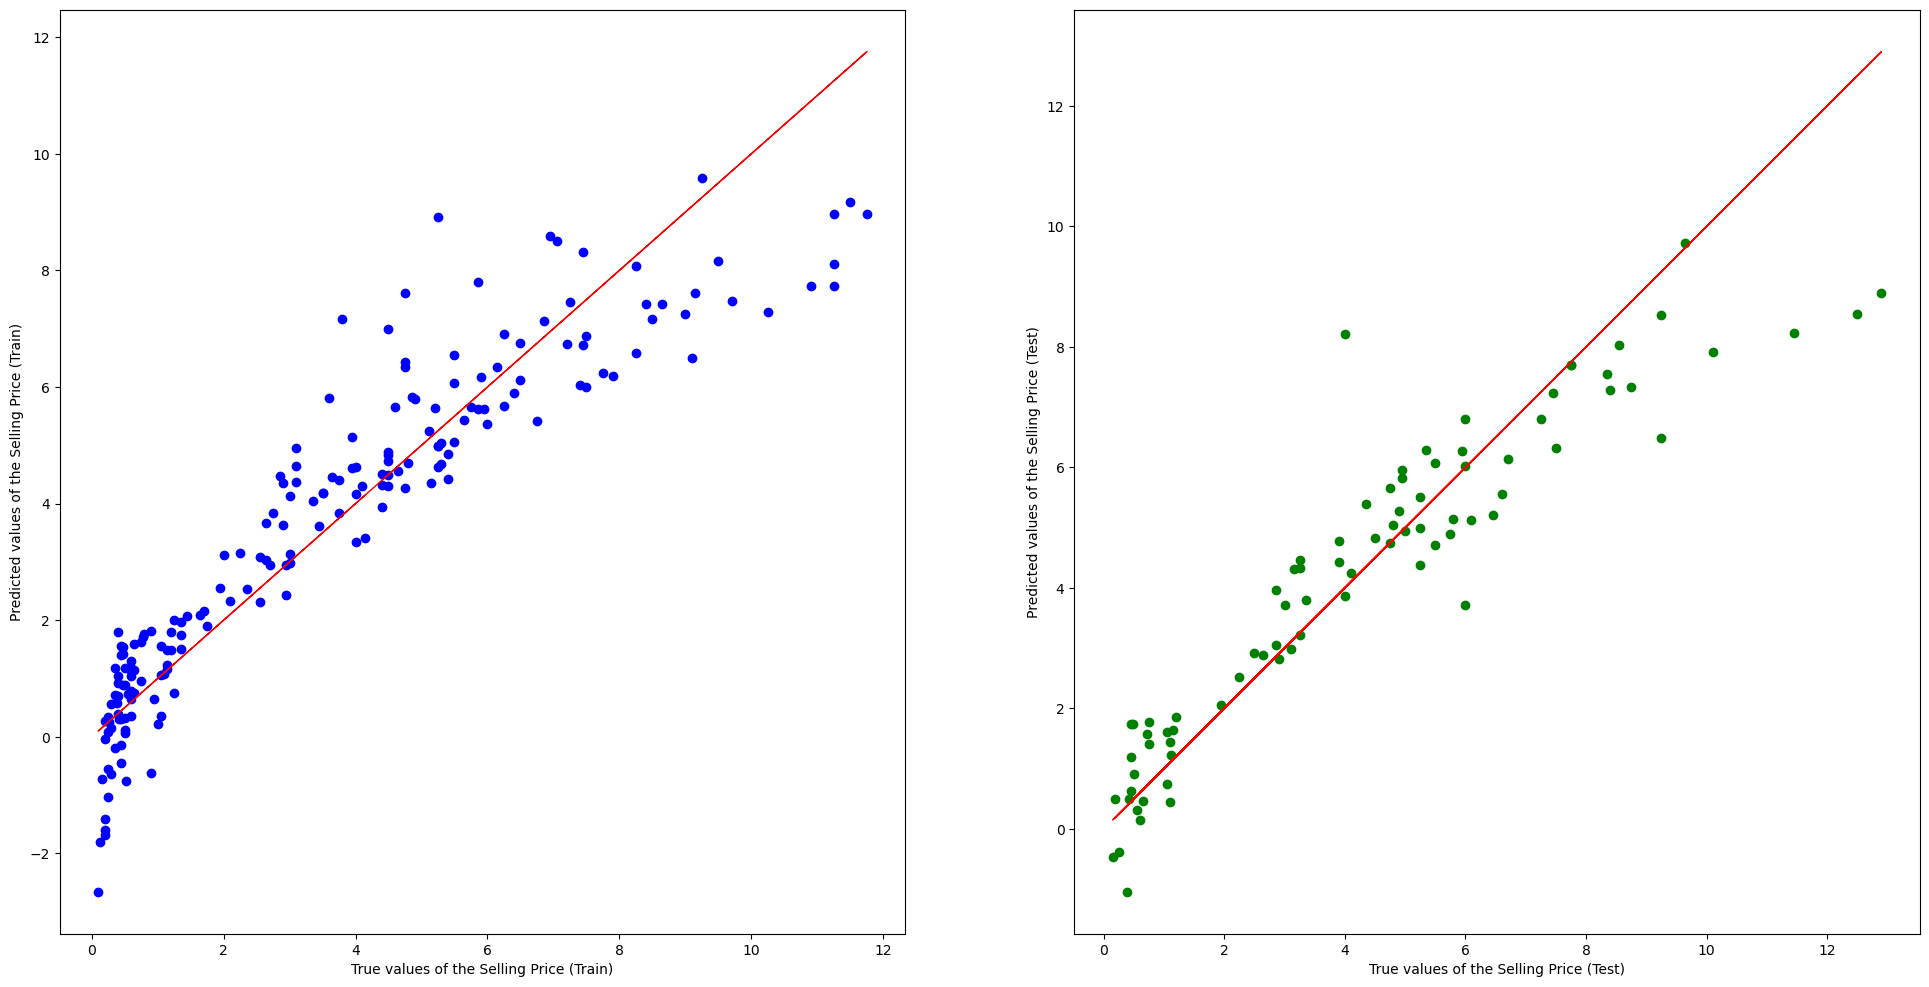

In [1252]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_out, y_train_out_pred, color = "blue")
axes[0].plot(y_train_out, y_train_out, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Selling Price (Train)")
axes[0].set_ylabel("Predicted values of the Selling Price (Train)")
axes[1].scatter(y_test_out, y_test_out_pred, color = "green")
axes[1].plot(y_test_out, y_test_out, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Selling Price (Test)")
axes[1].set_ylabel("Predicted values of the Selling Price (Test)")
plt.show()

## Evaluate model performance

In [1253]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train_out, y_train_out))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_out, y_train_out_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test_out, y_test_out))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_out, y_test_out_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8605359752899311
Mean Squared Error (MSE) 	: 1.2649832067576336

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8578617253689516
Mean Squared Error (MSE) 	: 1.3822143483910974



- **R-squared**: There is a slight decrease in the R-squared values for both train dataset (from 0.881 to 0.861) and test dataset (from 0.871 to 0.857). This implies that the R-squared values have not changed a lot.
- **Mean Squared Error (MSE)**: The MSE has decreased for both the train dataset (from 3.710 to 1.265) and test dataset (from 1.629 to 1.382). This is a significant improvement, indicating that the average squared difference between the estimated values and the actual value has been reduced, meaning better model performance.

## Comments and Considerations
  
Since our final prediction accuracy and confidence intervals rely on our model's MSE on the test set, an improvement has been made due to the increase in the value of MSE after removing outliers and refitting the model. It is still important to consider if the model meets all the assumptions of linear regression and whether further improvements could be made, perhaps by transforming features to reduce skewness or trying different models.


---

# Random Forest Regressor Attempt 1

Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the mean prediction of the individual trees. It is less likely to overfit than a single decision tree, and it can capture complex nonlinear relationships.

## Training the Model

In [1254]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=32, oob_score=True,max_depth = 3)


model.fit(X_train, y_train.values.ravel())
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## Visualizing Prediction

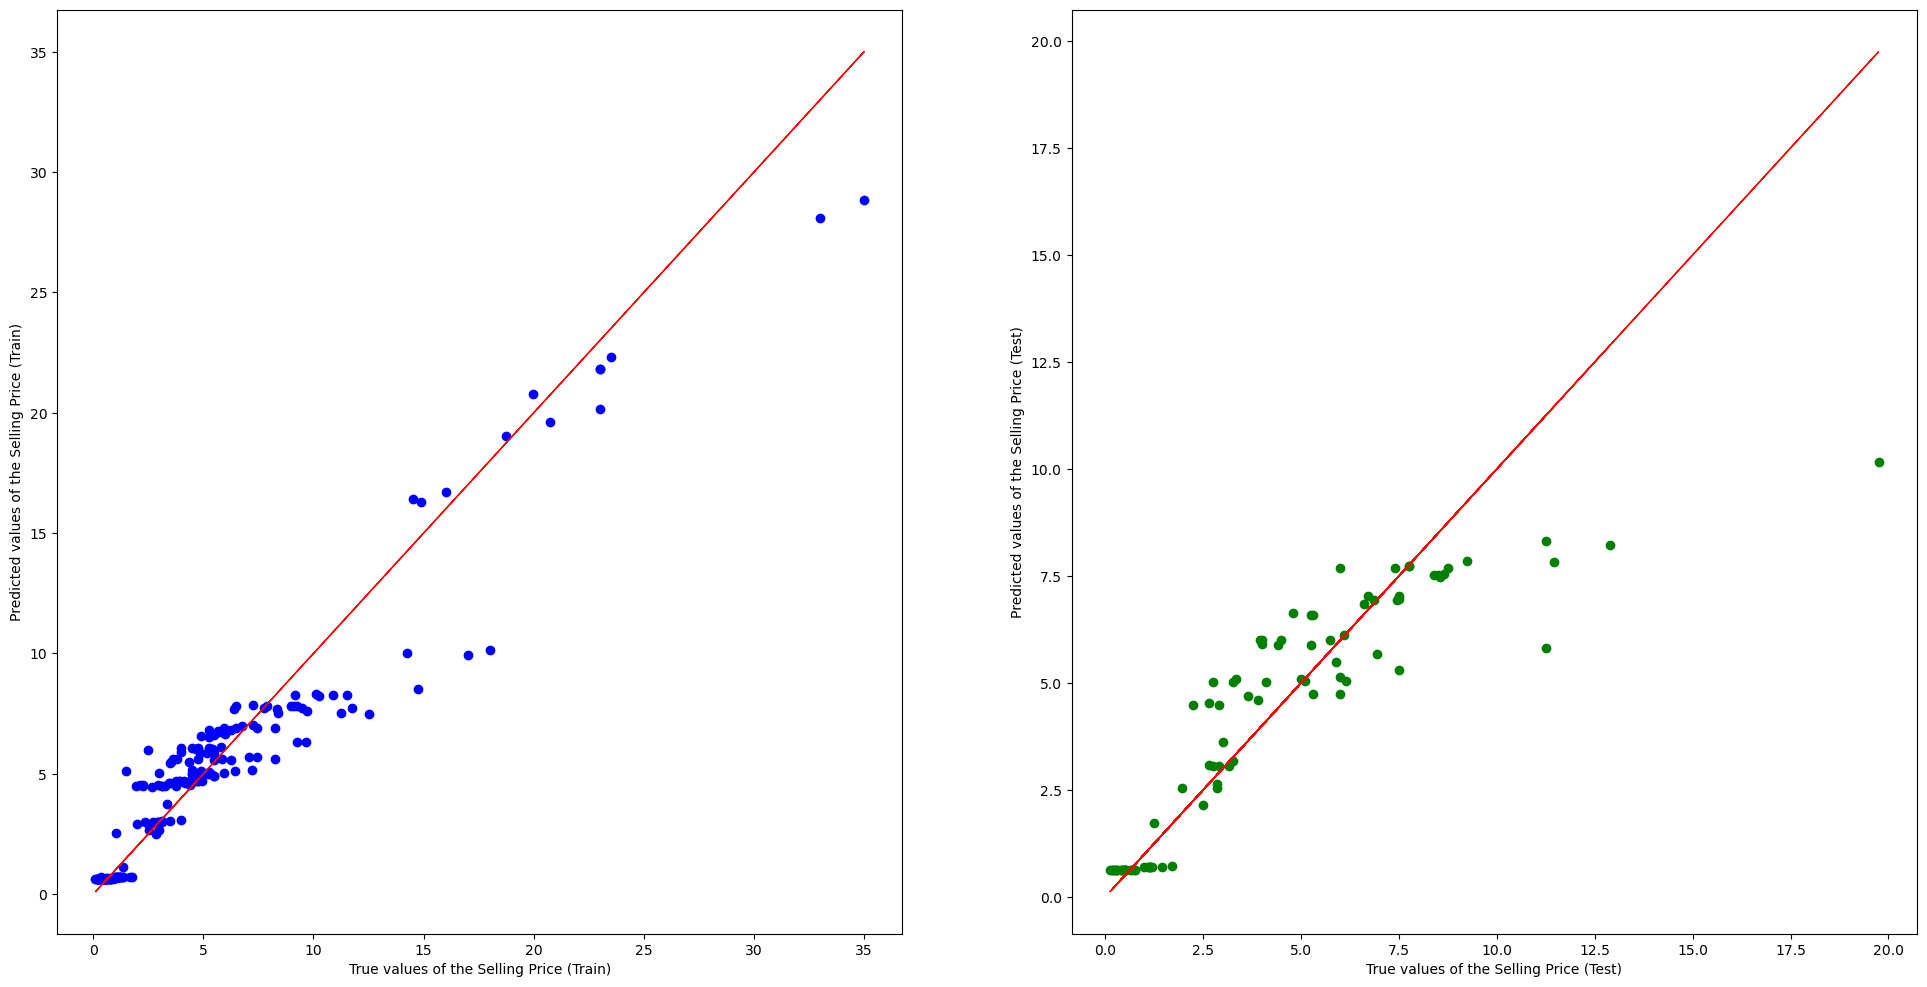

In [1255]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Selling Price (Train)")
axes[0].set_ylabel("Predicted values of the Selling Price (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Selling Price (Test)")
axes[1].set_ylabel("Predicted values of the Selling Price (Test)")
plt.show()

## Evaluate Model Performance

In [1256]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9200519110823111
Mean Squared Error (MSE) 	: 2.4975284225087133

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7905151056212313
Mean Squared Error (MSE) 	: 2.6504835762192576




- **R-squared**: The R-squared values are 0.920 for the train dataset and 0.791 for the test dataset. The higher value in train dataset suggests that the model fits the training data extremely well but does not perform as well on the test data.
  
- **Mean Squared Error (MSE)**: The MSE values are 2.498 for traning set and 2.650 for the test set. This implies that average squared difference between the observed and predicted values for train dataset is a bit lesser than that for test dataset, suggesting that the model produces a bit more precise predictions for train dataset.

---

# Random Forest Regressor Attempt 2


## Training the model - with outliers removed

In [1257]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=32, oob_score=True,max_depth = 3)


model.fit(X_train_out, y_train_out.values.ravel())
y_train_out_pred = model.predict(X_train_out)
y_test_out_pred = model.predict(X_test_out)

## Visualizing Prediction

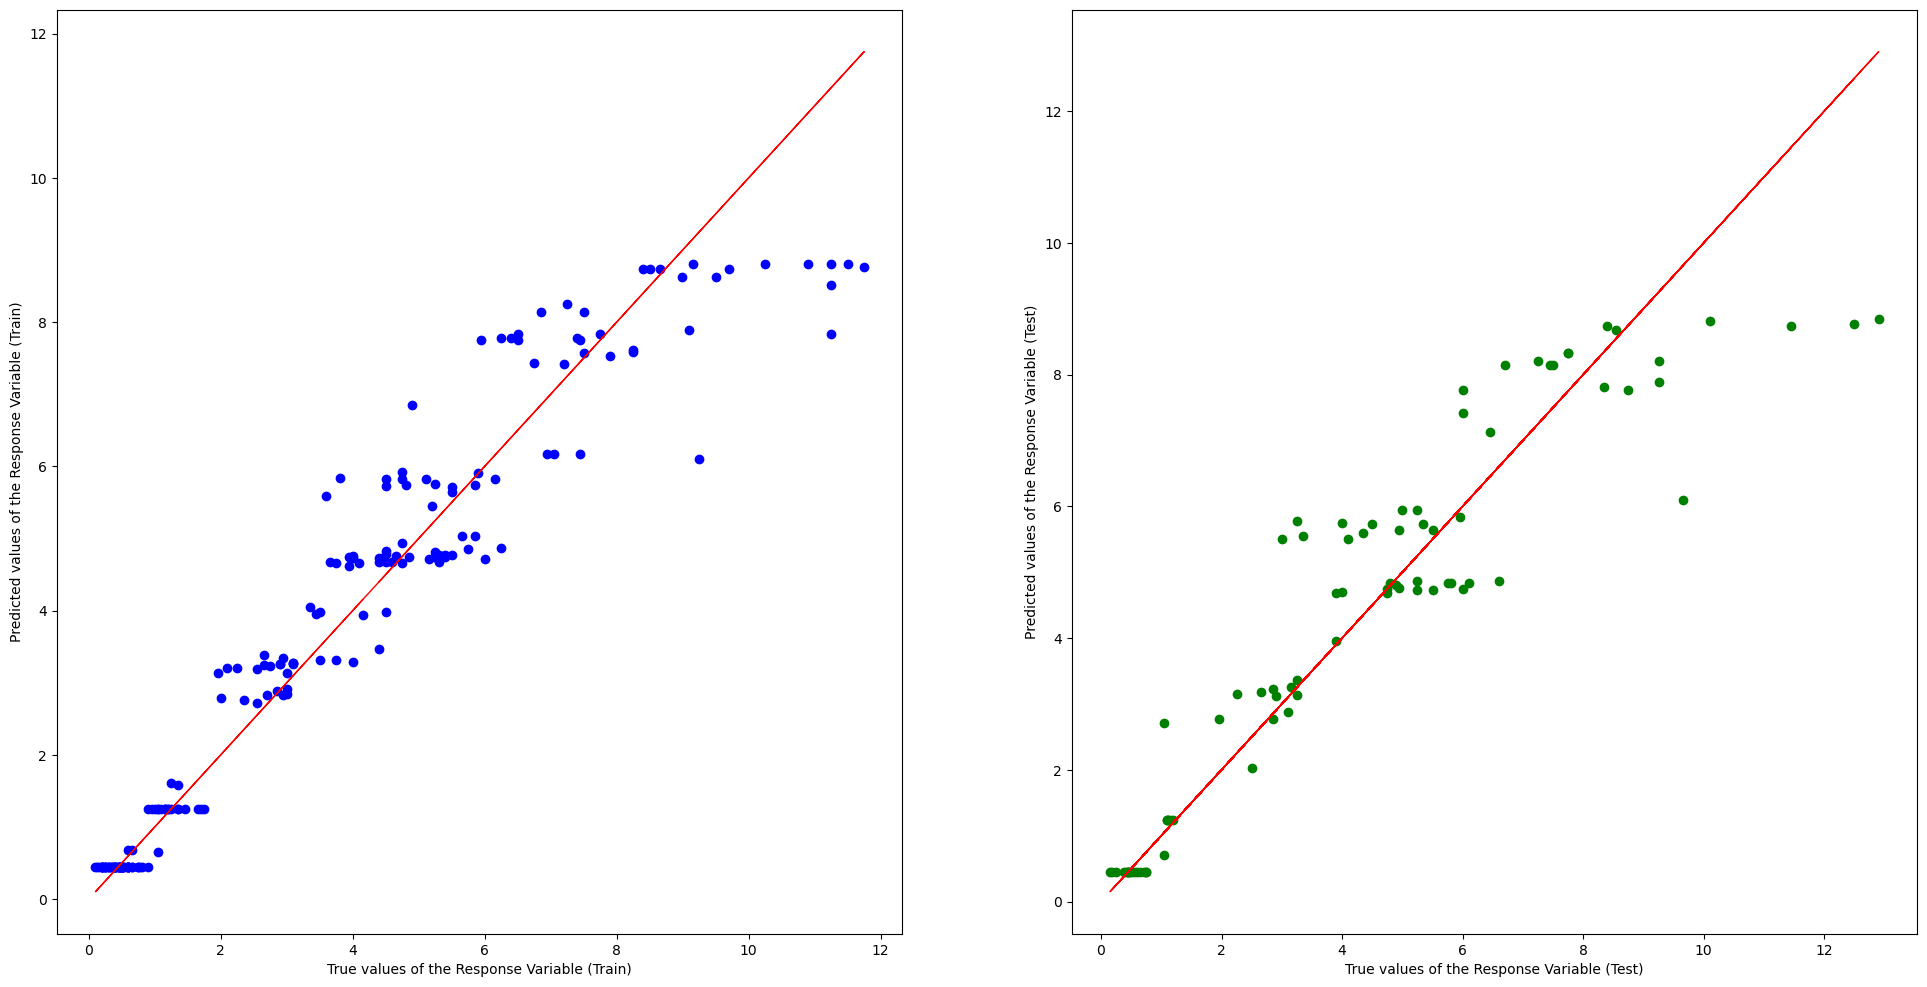

In [1258]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_out, y_train_out_pred, color = "blue")
axes[0].plot(y_train_out, y_train_out, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_out, y_test_out_pred, color = "green")
axes[1].plot(y_test_out, y_test_out, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Evaluate Model Performance

In [1259]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train_out, y_train_out))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_out, y_train_out_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test_out, y_test_out))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_out, y_test_out_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9276993759058778
Mean Squared Error (MSE) 	: 0.655789731490216

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8637206992060361
Mean Squared Error (MSE) 	: 1.3252391407949216



- **R-squared**: The R^2 values are 0.928 for the train set and 0.864 for the test set, which are both relatively high and quite close to 1. The high R^2 value indicates the model can explain a large portion of the variance in the data. Both the values increased compared to the first model, with the train set increased from 0.920 to 0.928 and the test set significantly increased from 0.791 to 0.864. 
  
- **Mean Squared Error (MSE)**:  The MSE has significantly decreased in both the train set (2.498 to 0.656) and test set (2.650 to 1.325). However, the MSE of the Train set is much better and smaller compared to that of the Test set. Therefore, it suggestes that this model is overfitting the Train data. 

## Comments and Considerations
  
Using The Random Forest model with outliers removed, MSE improved significantly with its value decreased while R^2 also improved with its value increased closer to 1 in both train dataset and test dataset. However, the results of MSE suggests that overfitting occured with the Random Forest model with outliers removed.  


---


# Discussion

###  Best Model for Predicting Selling Price

Among the models we explored, the best regression model is the **linear regression model with outlier removal**, as it exhibits low MSE and a high R^2 value while avoiding overfitting. The linear regression attempt with outlier removal shows notable improvements in both MSE and R-squared values compared to that without outlier removal.
